In [20]:
import os
import sys
import fitsio
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import astropy.io.fits as fits

from   astropy.table import Table

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/Sam/DESI/')

In [57]:
from schechter import schechter, named_schechter
from delta8_limits import dd8_limits, delta8_tier

In [4]:
root = os.environ['CSCRATCH'] + '/norberg/GAMA4/'
fpath = root + 'gama_gold_ddp_n8.fits'
fpath

'/global/cscratch1/sd/mjwilson/norberg/GAMA4/gama_gold_ddp_n8.fits'

In [5]:
! ls /global/cscratch1/sd/mjwilson/norberg/GAMA4/

cobaya				  gama_gold_ddp_n8_d0_1_vmax.fits
ddrp_limits			  gama_gold_ddp_n8_d0_2.fits
deprecated			  gama_gold_ddp_n8_d0_2_lumfn.fits
desi_gold.fits			  gama_gold_ddp_n8_d0_2_vmax.fits
gama_gold.fits			  gama_gold_ddp_n8_d0_3.fits
gama_gold_ddp.fits		  gama_gold_ddp_n8_d0_3_lumfn.fits
gama_gold_ddp_n8.fits		  gama_gold_ddp_n8_d0_3_vmax.fits
gama_gold_ddp_n8_d0_0.fits	  gama_gold_kE.fits
gama_gold_ddp_n8_d0_0_lumfn.fits  gama_gold_lumfn.fits
gama_gold_ddp_n8_d0_0_vmax.fits   gama_gold_vmax.fits
gama_gold_ddp_n8_d0_1.fits	  gama_gold_zmax.fits
gama_gold_ddp_n8_d0_1_lumfn.fits


In [45]:
ddps = fits.open('/global/cscratch1/sd/mjwilson/norberg/GAMA4/gama_gold_ddp_n8.fits')
ddps = ddps[1].header
ddps

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  393 / length of dimension 1                          
NAXIS2  =               113687 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   52 / number of table fields                         
TTYPE1  = 'CATAID  '                                                            
TFORM1  = 'J       '                                                            
TTYPE2  = 'OBJID   '                                                            
TFORM2  = 'K       '                                                            
TTYPE3  = 'RA      '        

In [46]:
! ls /global/cscratch1/sd/mjwilson/desi/BGS/Sam

randoms_G9_0.fits     randoms_bd_G9_0.fits	   safe
randoms_N8_G9_0.fits  randoms_bd_ddp_n8_G9_0.fits  v0


In [47]:
randoms = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/Sam/randoms_bd_ddp_n8_G9_0.fits')
randoms

RANDOM_RA,RANDOM_DEC,Z,V,RANDID,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,IS_BOUNDARY,N8,BOUND_DIST,BOUND_ID,DDP1_N8,DDP2_N8,DDP3_N8,FILLFACTOR,DDP1_DELTA8,DDP2_DELTA8,DDP3_DELTA8
float32,float32,float32,float32,int64,bytes2,float32,float32,float32,int64,int32,float64,int64,int64,int64,int64,float64,float64,float64,float64
134.1185,-0.808964,0.16447665,662216.5,541755,G9,477.0616,-7.3086348,-10.883285,0,1090,9.774657518542892,673717,39,57,0,1.0164778592052301,2.3230820383954414,1.6336315912400963,-1.0
138.95676,2.6404722,0.24579756,2098134.0,1104169,G9,698.7809,48.364056,26.22122,0,970,4.346966069687991,337314,3,0,0,0.9045720398431865,-0.7127550022322735,-1.0,-1.0
130.0458,-0.3668098,0.24854927,2165501.2,1081817,G9,705.64355,-61.12442,-10.666243,0,1065,11.795548078978328,424942,1,0,0,0.9931641468381377,-0.9127925984867935,-1.0,-1.0
133.66829,0.29416147,0.23967364,1952958.9,827053,G9,684.2005,-15.8584385,-2.4309745,0,1102,26.83388185444483,1111677,6,0,0,1.0276684411414345,-0.49432368814030003,-1.0,-1.0
135.87224,-1.7450509,0.28237346,3105515.2,1542999,G9,798.11597,12.209394,-31.261341,0,847,2.9014505174250056,1422889,0,0,0,0.7898685749970916,-1.0,-1.0,-1.0
133.17665,2.6008437,0.17796256,831746.6,575370,G9,514.3087,-16.33149,18.897867,0,906,3.227366432430104,1362459,4,15,0,0.8448889361834299,-0.5899519531498238,-0.16618495571868674,-1.0
135.21371,1.9626317,0.2526735,2268975.8,1759399,G9,719.2336,2.7313383,18.392054,0,1070,12.592323623895311,221050,0,0,0,0.9978268893115562,-1.0,-1.0,-1.0
138.70532,0.047041986,0.29556105,3530214.8,161017,G9,831.9195,53.93429,-6.5437675,0,1095,9.00704178614997,1244039,0,0,0,1.0211406016786486,-1.0,-1.0,-1.0
135.60945,2.12468,0.23722042,1896622.0,1646351,G9,677.43146,7.2503963,19.241734,0,1076,10.051226966645427,1821948,48,0,0,1.0034221802796583,3.1431620495865387,-1.0,-1.0


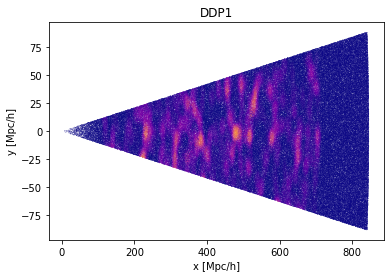

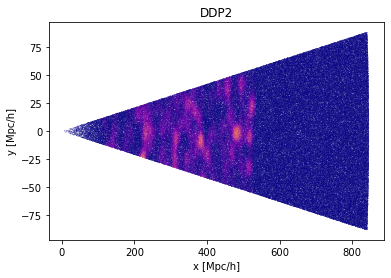

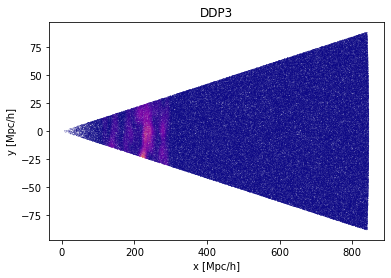

In [71]:
randoms_slice = randoms[np.abs(randoms['CARTESIAN_Z']) < 5.]

for idx in np.arange(1, 4, 1):
    plt.scatter(randoms_slice['CARTESIAN_X'], randoms_slice['CARTESIAN_Y'], c=randoms_slice['DDP{}_DELTA8'.format(idx)], marker='.', lw=0.0, s=1, vmin=-1., vmax=10., cmap='plasma')

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')
    
    plt.title('DDP{}'.format(idx))
    plt.show()

# d8 volume fractions

In [73]:
tiers  = delta8_tier(randoms['DDP1_DELTA8'])
utiers = np.unique(tiers)

for ut in utiers:
    in_tier = (tiers == ut)
    
    print('{}\t\t{:.3f}'.format(ut, 100. * np.mean(in_tier)))

-99		74.785
0		9.844
1		9.135
2		5.462
3		0.775


In [74]:
lfs  = {}
vs   = {}
ddps = {}

for i in range(4):
    ddps[i] = Table.read(root + '/gama_gold_ddp_n8_d0_{}.fits'.format(i))
    vs[i]   = Table.read(root + '/gama_gold_ddp_n8_d0_{}_vmax.fits'.format(i))
    lfs[i]  = Table.read(root + '/gama_gold_ddp_n8_d0_{}_lumfn.fits'.format(i))

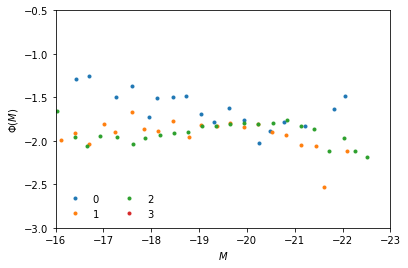

In [76]:
for key in lfs.keys():
    gama_lf = lfs[key]

    sc = named_schechter(gama_lf['MEDIAN_M'], named_type='TMR')

    lims = dd8_limits[key]
    d8 = np.mean(lims)

    sc *= (1. + d8) / (1. + 0.007)
    
    pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX'] / sc), label=key, marker='.', lw=0.0)

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-3.0,   -.5)
pl.xlim(-16., -23.0)

pl.legend(frameon=False, loc=3, ncol=2)

# Done.